# Code Imports & Data Load

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy

import sys 
sys.path.append('../python/')
import cfg
import lme

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R -o rnd_fx_terms,fix_fx_terms_fea,fix_fx_terms_ent

source("../R/lme.R")

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




In [4]:
df_samples, df_samples_games, df_samples_convs = lme.load_samples()

no normalization requested, only renaming "_raw" columns
turn exchanges before removing feature outliers: 6364
after: 5284


# Correlations between features

In [5]:
# max absolute value of any pairwise correlation between intensity_mean,
# pitch_mean, shimmer, and rate_syl is less than 0.22, weak
for i, f1 in enumerate(cfg.FEATURES):
    for f2 in cfg.FEATURES[i+1:]:
        print(f1, f2, 
              scipy.stats.pearsonr(df_samples[f1], df_samples[f2]))

intensity_mean intensity_max (0.9553708462015246, 0.0)
intensity_mean pitch_mean (-0.211386076749648, 4.7942513454955626e-107)
intensity_mean pitch_max (0.03237374232702912, 0.0008730728380906791)
intensity_mean jitter (0.05342750872735472, 3.892409501531427e-08)
intensity_mean shimmer (0.007043757914210015, 0.4690490836716107)
intensity_mean nhr (0.17251586122623636, 2.1400598760437907e-71)
intensity_mean rate_syl (-0.08694728062266922, 3.423587821224301e-19)
intensity_max pitch_mean (-0.20305106958474703, 9.53709889264247e-99)
intensity_max pitch_max (0.11713886769300029, 1.3123268707182041e-33)
intensity_max jitter (0.1086075785659214, 4.229401900734216e-29)
intensity_max shimmer (0.11169095420284958, 1.0881096659359746e-30)
intensity_max nhr (0.24101387593439744, 1.6017705379178934e-139)
intensity_max rate_syl (-0.08080234562848101, 8.85840355747973e-17)
pitch_mean pitch_max (0.5544610877265725, 0.0)
pitch_mean jitter (-0.3093981700426527, 3.3813274881609217e-233)
pitch_mean shimme

# Residual Computation - Initial Run

## Game Sessions

In [6]:
df = df_samples_games

In [7]:
%%R -i df -o pred_int,pred_pit,pred_rat,pred_shi

df <- prep_data(df)
pred_int = get_feature_pred("df$intensity_mean", "GAME")
pred_pit = get_feature_pred("df$pitch_mean", "GAME")
pred_rat = get_feature_pred("df$rate_syl", "GAME")
pred_shi = get_feature_pred("df$shimmer", "GAME")

df$intensity_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xa140468>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 48980.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7115 -0.6266  0.0350  0.6779  3.8910 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 22.43    4.736   
 Residual              33.70    5.805   
Number of obs: 7694, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       5.033e+01  1.360e+00  6.131e+00  37.008 1.93e-08 ***
df$final1        -2.430e-01  6.660e-02  7.672e+03  -3.649 0.000265 ***
df$duration       1.718e+00  9.695e-02  7.674e+03 

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.2421318 0.5449862
df$pitch_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xaa2b2a0>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 76932.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7688 -0.5592 -0.1469  0.4080  6.9142 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept)  292.4   17.10   
 Residual              1285.3   35.85   
Number of obs: 7694, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       1.683e+02  4.974e+00  6.377e+00  33.837 1.94e-08 ***
df$final1        -1.406e+00  4.113e-01  7.672e+03  -3.418 0.000634 ***
df$d

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.4766278 0.5736237
df$rate_syl ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xf48aee8>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 30517.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0464 -0.7000 -0.0061  0.6605  3.3722 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 0.644    0.8025  
 Residual              3.045    1.7451  
Number of obs: 7694, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       5.001e+00  2.338e-01  6.394e+00  21.391 3.43e-07 ***
df$final1         8.211e-02  2.002e-02  7.672e+03   4.101 4.16e-05 ***
df$dur

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m       R2c
[1,] 0.08149863 0.2418375
df$shimmer ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xd3e2fe0>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: -27291

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5481 -0.6920 -0.1093  0.5552  4.0108 

Random effects:
 Groups    Name        Variance  Std.Dev.
 df$spk_id (Intercept) 0.0001389 0.01178 
 Residual              0.0016373 0.04046 
Number of obs: 7694, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       1.079e-01  3.538e-03  6.976e+00  30.497 1.10e-08 ***
df$final1         1.818e-03  4.642e-04  7.672e+03   3.915 9.11e-05 ***
df$

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m       R2c
[1,] 0.08652386 0.1579503


In [8]:
df_run1_games = lme.get_residuals(
    df, pred_int, pred_pit, pred_rat, pred_shi, 'GAME', 'all')
df_final_samples_games, df_outliers_games = lme.remove_res_outliers(
    df_run1_games, df_samples_games)

ipus before removing residual outliers: 7694
after: 7258


## Conversation Sessions

In [9]:
df = df_samples_convs

In [10]:
%%R -i df -o pred_int,pred_pit,pred_rat,pred_shi

df <- prep_data(df)
pred_int = get_feature_pred("df$intensity_mean", "CONV")
pred_pit = get_feature_pred("df$pitch_mean", "CONV")
pred_rat = get_feature_pred("df$rate_syl", "CONV")
pred_shi = get_feature_pred("df$shimmer", "CONV")

df$intensity_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xdc7d738>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 17984.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8490 -0.6575 -0.0259  0.6545  3.9430 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 29.79    5.458   
 Residual              29.93    5.471   
Number of obs: 2874, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.835e+01  1.575e+00  6.215e+00  30.699 5.05e-08 ***
df$final1     -4.109e-01  1.033e-01  2.855e+03  -3.979 7.08e-05 ***
df$duration    1.567e+00  1.092e-01  2.856e+03  14.353  < 2e-16 ***
df$start_time  8.205e-04  5.818e-04  2.8

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.2944892 0.6463856
df$pitch_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xd11f2f0>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 28141.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9172 -0.5631 -0.1444  0.4268  6.1384 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept)  433     20.81   
 Residual              1044     32.32   
Number of obs: 2874, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.697e+02  6.102e+00  6.519e+00  27.806  5.1e-08 ***
df$final1     -1.068e+00  6.099e-01  2.855e+03  -1.751  0.08006 .  
df$duration   -1.678e+00  6.447e-01  2.857e+03  -2.603  0.0092

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.5191205 0.6600552
df$rate_syl ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xc4822b0>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 11465.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9476 -0.7102 -0.0223  0.6430  3.3265 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 0.5008   0.7077  
 Residual              3.0778   1.7544  
Number of obs: 2874, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.572e+00  2.160e-01  7.356e+00  21.163 7.36e-08 ***
df$final1      1.699e-01  3.311e-02  2.855e+03   5.131 3.07e-07 ***
df$duration    2.109e-01  3.499e-02  2.859e+03   6.027 1.88e-09 

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




          R2m       R2c
[1,] 0.120556 0.2436358
df$shimmer ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xd4825a0>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: -10687.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9981 -0.7117 -0.0964  0.5626  4.4013 

Random effects:
 Groups    Name        Variance  Std.Dev.
 df$spk_id (Intercept) 6.005e-05 0.007749
 Residual              1.338e-03 0.036585
Number of obs: 2874, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    9.076e-02  2.731e-03  1.106e+01  33.232 1.96e-12 ***
df$final1      2.495e-03  6.904e-04  2.856e+03   3.613 0.000307 ***
df$duration    6.655e-03  7.288e-04  2.859e+03   9.132  < 2e-16

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.1708451 0.2064481


In [11]:
df_run1_convs = lme.get_residuals(
    df, pred_int, pred_pit, pred_rat, pred_shi, 'CONV', 'all')
df_final_samples_convs, df_outliers_convs = lme.remove_res_outliers(
    df_run1_convs, df_samples_convs)

ipus before removing residual outliers: 2874
after: 2676


# Residuals - Second Run

## Game sessions

In [12]:
df = df_final_samples_games

In [13]:
%%R -i df -o pred_int,pred_pit,pred_rat,pred_shi

df <- prep_data(df)
pred_int = get_feature_pred("df$intensity_mean", "GAME")
pred_pit = get_feature_pred("df$pitch_mean", "GAME")
pred_rat = get_feature_pred("df$rate_syl", "GAME")
pred_shi = get_feature_pred("df$shimmer", "GAME")

df$intensity_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xd2512f8>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 45950.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.06034 -0.63834  0.03416  0.68260  3.01516 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 22.80    4.775   
 Residual              32.52    5.702   
Number of obs: 7258, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       5.033e+01  1.371e+00  6.132e+00  36.706 2.02e-08 ***
df$final1        -2.562e-01  6.735e-02  7.236e+03  -3.805 0.000143 ***
df$duration       1.723e+00  9.819e-02  

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.2497065 0.5589422
df$pitch_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xd563ef0>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 69841.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5714 -0.5820 -0.1319  0.5065  3.8823 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 350.3    18.72   
 Residual              881.2    29.68   
Number of obs: 7258, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       1.660e+02  5.403e+00  6.229e+00  30.716 4.89e-08 ***
df$final1        -1.741e+00  3.506e-01  7.236e+03  -4.966 7.00e-07 ***
df$d

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.5506622 0.6784755
df$rate_syl ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0xd8b19a8>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 28658.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.94662 -0.70392  0.00226  0.66772  3.04156 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 0.677    0.8228  
 Residual              2.989    1.7290  
Number of obs: 7258, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       4.998e+00  2.397e-01  6.394e+00  20.852 4.04e-07 ***
df$final1         7.473e-02  2.042e-02  7.236e+03   3.660 0.000254 

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m       R2c
[1,] 0.08470077 0.2537182
df$shimmer ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$speaker_role + df$score_z + df$prev_score_z + (1 | df$spk_id)
<environment: 0x101be190>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: -26591.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5787 -0.6952 -0.0948  0.5865  3.2751 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 0.000110 0.01049 
 Residual              0.001454 0.03814 
Number of obs: 7258, groups:  df$spk_id, 16

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       1.049e-01  3.179e-03  7.180e+00  33.005 4.17e-09 ***
df$final1         2.067e-03  4.504e-04  7.236e+03   4.588 4.55e-06 ***
df$

R[write to console]: 
Correlation matrix not shown by default, as p = 16 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m       R2c
[1,] 0.09684856 0.1603812


In [14]:
df_final_games = lme.get_residuals(
    df, pred_int, pred_pit, pred_rat, pred_shi, 'GAME', 'all')
zeros = np.zeros_like(pred_int)
df_final_games_z = lme.get_residuals(
    df, zeros, zeros, zeros, zeros, 'GAME', 'spk')

## Conversation sessions

In [15]:
df = df_final_samples_convs

In [16]:
%%R -i df -o pred_int,pred_pit,pred_rat,pred_shi

df <- prep_data(df)
pred_int = get_feature_pred("df$intensity_mean", "CONV")
pred_pit = get_feature_pred("df$pitch_mean", "CONV")
pred_rat = get_feature_pred("df$rate_syl", "CONV")
pred_shi = get_feature_pred("df$shimmer", "CONV")

df$intensity_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xfdf1730>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 16576.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.15326 -0.66681 -0.01775  0.66612  3.10357 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 30.19    5.495   
 Residual              28.06    5.297   
Number of obs: 2676, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.843e+01  1.586e+00  6.213e+00  30.548 5.22e-08 ***
df$final1     -4.102e-01  1.036e-01  2.657e+03  -3.960 7.70e-05 ***
df$duration    1.569e+00  1.086e-01  2.658e+03  14.449  < 2e-16 ***
df$start_time  7.053e-04  5.81

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.3026717 0.6640871
df$pitch_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xd43a2a8>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 25410.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4448 -0.6033 -0.1378  0.4784  3.5068 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 458.1    21.40   
 Residual              775.1    27.84   
Number of obs: 2676, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.692e+02  6.234e+00  6.390e+00  27.139 7.67e-08 ***
df$final1     -1.128e+00  5.445e-01  2.657e+03  -2.071  0.03843 *  
df$duration   -1.381e+00  5.706e-01  2.659e+03  -2.420  0.0155

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.5769197 0.7340733
df$rate_syl ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xd459790>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 10614.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.01162 -0.72481 -0.01125  0.65352  3.02257 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 0.4956   0.704   
 Residual              3.0034   1.733   
Number of obs: 2676, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.540e+00  2.157e-01  7.431e+00  21.049 6.78e-08 ***
df$final1      1.802e-01  3.389e-02  2.657e+03   5.318 1.14e-07 ***
df$duration    2.196e-01  3.550e-02  2.662e+03   6.185

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.1307719 0.2538886
df$shimmer ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    (1 | df$spk_id)
<environment: 0xc17f910>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: -10347.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9547 -0.7271 -0.0835  0.6084  3.3567 

Random effects:
 Groups    Name        Variance  Std.Dev.
 df$spk_id (Intercept) 3.673e-05 0.00606 
 Residual              1.149e-03 0.03390 
Number of obs: 2676, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    8.748e-02  2.314e-03  1.361e+01  37.796 3.51e-15 ***
df$final1      2.765e-03  6.629e-04  2.659e+03   4.171 3.13e-05 ***
df$duration    7.610e-03  6.931e-04  2.651e+03  10.980  < 2e-

R[write to console]: 
Correlation matrix not shown by default, as p = 13 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.2072827 0.2318293


In [17]:
df_final_convs = lme.get_residuals(
    df, pred_int, pred_pit, pred_rat, pred_shi, 'CONV', 'all')
zeros = np.zeros_like(pred_int)
df_final_convs_z = lme.get_residuals(
    df, zeros, zeros, zeros, zeros, 'CONV', 'spk')

# Game & Conversation sessions

(only to determine main effect of session type)

In [18]:
df = pd.concat([df_final_samples_games, df_final_samples_convs])

In [19]:
%%R -i df -o pred_int,pred_pit,pred_rat,pred_shi

df <- prep_data(df)
pred_int = get_feature_pred("df$intensity_mean", "BOTH")
pred_pit = get_feature_pred("df$pitch_mean", "BOTH")
pred_rat = get_feature_pred("df$rate_syl", "BOTH")
pred_shi = get_feature_pred("df$shimmer", "BOTH")

df$intensity_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$ses_type + (1 | df$spk_id)
<environment: 0xf38d268>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 63390.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4994 -0.6489  0.0348  0.6761  3.0775 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 24.23    4.922   
 Residual              34.29    5.856   
Number of obs: 9934, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.927e+01  1.410e+00  6.088e+00  34.932 3.02e-08 ***
df$final1     -3.144e-01  5.918e-02  9.914e+03  -5.313 1.10e-07 ***
df$duration    1.957e+00  7.575e-02  9.916e+03  25.831  < 2e-16 ***
df$start_time -1.388e-04  

R[write to console]: 
Correlation matrix not shown by default, as p = 14 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.2295128 0.5484676
df$pitch_mean ~ 1 + df$final + df$duration + df$start_time + 
    df$sex + df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$ses_type + (1 | df$spk_id)
<environment: 0xd479668>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 95363

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7009 -0.5793 -0.1438  0.4966  4.0064 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 364.2    19.08   
 Residual              861.2    29.35   
Number of obs: 9934, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.669e+02  5.486e+00  6.145e+00  30.422 6.18e-08 ***
df$final1     -1.614e+00  2.966e-01  9.914e+03  -5.442 5.41e-08 ***
df$duration    8.850e-01  3.796e-01  9.917e+03   2

R[write to console]: 
Correlation matrix not shown by default, as p = 14 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m      R2c
[1,] 0.5578817 0.689277
df$rate_syl ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$ses_type + (1 | df$spk_id)
<environment: 0xd59d598>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 39689.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0198 -0.6947 -0.0042  0.6618  3.1747 

Random effects:
 Groups    Name        Variance Std.Dev.
 df$spk_id (Intercept) 0.655    0.8093  
 Residual              3.147    1.7741  
Number of obs: 9934, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    4.908e+00  2.345e-01  6.290e+00  20.929 4.70e-07 ***
df$final1      1.046e-01  1.793e-02  9.914e+03   5.834 5.59e-09 ***
df$duration    7.255e-02  2.295e-02  9.918e+03   3.1

R[write to console]: 
Correlation matrix not shown by default, as p = 14 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m       R2c
[1,] 0.05877242 0.2209001
df$shimmer ~ 1 + df$final + df$duration + df$start_time + df$sex + 
    df$tipi_o_hl + df$tipi_c_hl + df$tipi_e_hl + df$tipi_a_hl + 
    df$tipi_n_hl + df$mc_sds_hl + df$iri_pt_hl + df$rmi_hl + 
    df$ses_type + (1 | df$spk_id)
<environment: 0xd489de8>
Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: -36845.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6597 -0.7066 -0.0993  0.5884  3.5047 

Random effects:
 Groups    Name        Variance  Std.Dev.
 df$spk_id (Intercept) 6.877e-05 0.008293
 Residual              1.405e-03 0.037481
Number of obs: 9934, groups:  df$spk_id, 16

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    9.974e-02  2.522e-03  7.238e+00  39.550 1.00e-09 ***
df$final1      2.297e-03  3.788e-04  9.914e+03   6.066 1.36e-09 ***
df$duration    3.854e-03  4.845e-04  9.914e+0

R[write to console]: 
Correlation matrix not shown by default, as p = 14 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m       R2c
[1,] 0.1083699 0.1499824


# Normality

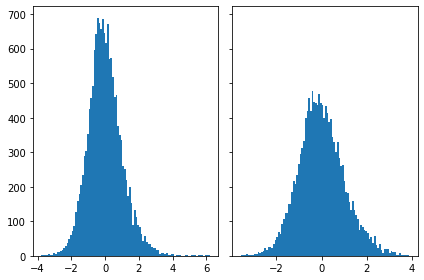

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

_ = axs[0].hist(df_run1_games['residuals'], bins=100)
_ = axs[1].hist(df_final_games['residuals'], bins=100)

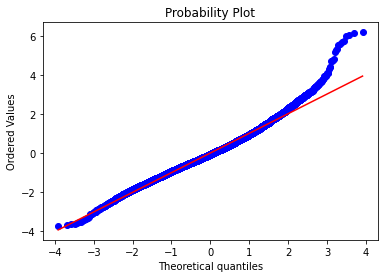

In [21]:
scipy.stats.probplot(df_run1_games['residuals'].values, dist="norm", plot=pylab)
pylab.show()

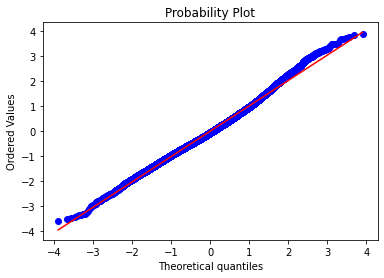

In [22]:
scipy.stats.probplot(df_final_games['residuals'].values, dist="norm", plot=pylab)
pylab.show()

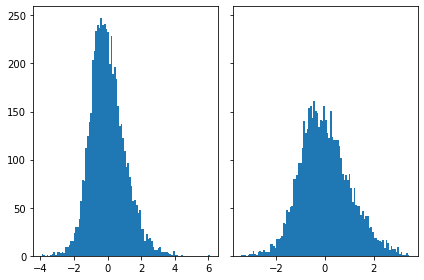

In [23]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

_ = axs[0].hist(df_run1_convs['residuals'], bins=100)
_ = axs[1].hist(df_final_convs['residuals'], bins=100)

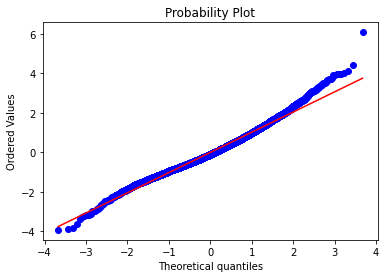

In [24]:
scipy.stats.probplot(df_run1_convs['residuals'].values, dist="norm", plot=pylab)
pylab.show()

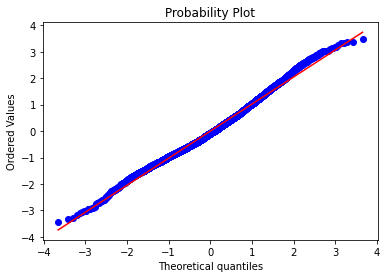

In [25]:
scipy.stats.probplot(df_final_convs['residuals'].values, dist="norm", plot=pylab)
pylab.show()

# Final Models

## Game sessions

In [26]:
df = df_final_games

In [27]:
%%R -i df -o df_res_rnd_game,df_res_fix_game,res_comp_game

# non-singular fit: list(3,4,6,8,9,10)
tri <- run_models(rnd_fx_ids=list(3,4,8), ses_type="GAME")
df_res_rnd_game <- tri[[1]]
df_res_fix_game <- tri[[2]]
res_comp_game <- tri[[3]]

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 41649.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5187 -0.6546 -0.0583  0.6202  3.8546 

Random effects:
 Groups                      Name                Variance Std.Dev.
 df$feature:df$spk_id_paired (Intercept)         0.003780 0.06148 
 df$spk_id_paired            (Intercept)         0.003595 0.05996 
 df$feature                  df$residuals_paired 0.003969 0.06300 
 Residual                                        1.016977 1.00845 
Number of obs: 14516, groups:  
df$feature:df$spk_id_paired, 64; df$spk_id_paired, 16; df$feature, 4

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  2.409e-03  1.886e-02  1.405e+01
df$residuals_paired                          6.602e-02  3.361e-02  3.359e+00
df$residuals_paired:df$sex1                 -4.557e-03  1.2

R[write to console]: 
Correlation matrix not shown by default, as p = 24 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




             R2m        R2c
[1,] 0.006250198 0.01709351


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df Pr(>Chisq)
m_sub   27 41539.98 41744.72 -20742.99 41485.98       NA NA         NA
m0      28 41536.51 41748.84 -20740.26 41480.51 5.468176  1 0.01936583


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(0+df$residuals_paired|df$feature)"
      npar      AIC      BIC    logLik deviance    Chisq Df   Pr(>Chisq)
m_sub   27 41563.62 41768.36 -20754.81 41509.62       NA NA           NA
m0      28 41536.51 41748.84 -20740.26 41480.51 29.10536  1 6.854714e-08


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$feature:df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance  Chisq Df  Pr(>Chisq)
m_sub   27 41544.38 41749.12 -20745.19 41490.38     NA NA          NA
m0      28 41536.51 41748.84 -20740.26 41480.51 9.8691  1 0.001680777


In [28]:
df = df_final_games[df_final_games['feature']=='intensity_mean']

In [29]:
%%R -i df

tri <- run_models(rnd_fx_ids=list(3), ses_type="GAME")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 10490.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0024 -0.6445  0.0394  0.6790  3.2653 

Random effects:
 Groups           Name        Variance Std.Dev.
 df$spk_id_paired (Intercept) 0.0251   0.1584  
 Residual                     1.0135   1.0067  
Number of obs: 3629, groups:  df$spk_id_paired, 16

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                  6.329e-03  4.319e-02  1.447e+01
df$residuals_paired                          1.690e-01  2.527e-02  3.599e+03
df$residuals_paired:df$sex1                  5.558e-02  2.615e-02  3.603e+03
df$residuals_paired:df$sex_paired1          -1.672e-03  2.599e-02  3.596e+03
df$residuals_paired:df$tipi_o_hl1           -1.268e-03  5.396e-02  3.598e+03
df$residuals_paired:df$tipi_c_hl1           -2.274e-02  3.014e-02  3.

R[write to console]: 
Correlation matrix not shown by default, as p = 24 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m        R2c
[1,] 0.03289658 0.05626937


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance   Chisq Df   Pr(>Chisq)
m_sub   25 10447.10 10602.02 -5198.550 10397.10      NA NA           NA
m0      26 10405.45 10566.56 -5176.723 10353.45 43.6532  1 3.920353e-11


In [30]:
df = df_final_games[df_final_games['feature']=='pitch_mean']

In [31]:
%%R -i df
# non-singular fit: list(6), 6 does not improve AIC
tri <- run_models(rnd_fx_ids=list(), ses_type="GAME")


Call:
lm(formula = frm)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5212 -0.5828 -0.1348  0.4640  3.8876 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                 -0.0022763  0.0163549  -0.139
df$residuals_paired                          0.0652809  0.0238559   2.736
df$residuals_paired:df$sex1                 -0.0469021  0.0254722  -1.841
df$residuals_paired:df$sex_paired1          -0.0157347  0.0256699  -0.613
df$residuals_paired:df$tipi_o_hl1           -0.0322496  0.0521615  -0.618
df$residuals_paired:df$tipi_c_hl1            0.0249307  0.0264343   0.943
df$residuals_paired:df$tipi_e_hl1           -0.0282344  0.0420320  -0.672
df$residuals_paired:df$tipi_a_hl1           -0.0311436  0.0273147  -1.140
df$residuals_paired:df$tipi_n_hl1            0.0041591  0.0233057   0.178
df$residuals_paired:df$mc_sds_hl1            0.0307188  0.0283510   1.084
df$residuals_paired:df$iri_pt_hl1            0.08434

In [34]:
df = df_final_games[df_final_games['feature']=='rate_syl']

In [35]:
%%R -i df
# non-singular fit: list(3,5), 5 does not improve AIC
tri <- run_models(rnd_fx_ids=list(3), ses_type="GAME")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 10551.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.72686 -0.71184 -0.00058  0.67135  3.15950 

Random effects:
 Groups           Name        Variance Std.Dev.
 df$spk_id_paired (Intercept) 0.003788 0.06155 
 Residual                     1.036097 1.01789 
Number of obs: 3629, groups:  df$spk_id_paired, 16

Fixed effects:
                                              Estimate Std. Error         df
(Intercept)                                 -5.001e-03  2.304e-02  1.343e+01
df$residuals_paired                          1.074e-02  2.370e-02  3.603e+03
df$residuals_paired:df$sex1                 -3.103e-02  2.674e-02  3.602e+03
df$residuals_paired:df$sex_paired1          -5.473e-03  2.584e-02  3.599e+03
df$residuals_paired:df$tipi_o_hl1            5.466e-02  5.175e-02  3.588e+03
df$residuals_paired:df$tipi_c_hl1            1.741e-02  2.8

R[write to console]: 
Correlation matrix not shown by default, as p = 24 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m        R2c
[1,] 0.01229666 0.01589469


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df Pr(>Chisq)
m_sub   25 10465.13 10620.05 -5207.565 10415.13       NA NA         NA
m0      26 10464.85 10625.96 -5206.423 10412.85 2.284671  1  0.1306578


In [32]:
df = df_final_games[df_final_games['feature']=='shimmer']

In [33]:
%%R -i df
# non-singular fit: list(3,5), 3 and 5 do not improve AIC
tri <- run_models(rnd_fx_ids=list(), ses_type="GAME")


Call:
lm(formula = frm)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5405 -0.7231 -0.1076  0.5989  3.4053 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  0.0017673  0.0170027   0.104
df$residuals_paired                          0.0354600  0.0234178   1.514
df$residuals_paired:df$sex1                 -0.0223116  0.0261887  -0.852
df$residuals_paired:df$sex_paired1           0.0047244  0.0254129   0.186
df$residuals_paired:df$tipi_o_hl1           -0.1376828  0.0536110  -2.568
df$residuals_paired:df$tipi_c_hl1           -0.0003352  0.0267262  -0.013
df$residuals_paired:df$tipi_e_hl1            0.0697660  0.0445737   1.565
df$residuals_paired:df$tipi_a_hl1           -0.0659953  0.0310511  -2.125
df$residuals_paired:df$tipi_n_hl1            0.0455585  0.0243967   1.867
df$residuals_paired:df$mc_sds_hl1            0.0525455  0.0284445   1.847
df$residuals_paired:df$iri_pt_hl1            0.03453

## Conversation Sessions

In [36]:
df = df_final_convs

In [37]:
%%R -i df -o df_res_rnd_conv,df_res_fix_conv,res_comp_conv

# non-singular fit: list(3,4,5,8,10)
tri <- run_models(rnd_fx_ids=list(8,10), ses_type="CONV")
df_res_rnd_conv <- tri[[1]]
df_res_fix_conv <- tri[[2]]
res_comp_conv <- tri[[3]]

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 15537.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5039 -0.6931 -0.0715  0.6078  3.4553 

Random effects:
 Groups                        Name                Variance Std.Dev.
 df.feature.df.spk_id_paired   (Intercept)         0.01295  0.1138  
 df.feature.df.spk_id_paired.1 df$residuals_paired 0.01028  0.1014  
 Residual                                          1.03303  1.0164  
Number of obs: 5352, groups:  df$feature:df$spk_id_paired, 64

Fixed effects:
                                           Estimate Std. Error         df
(Intercept)                              -3.786e-03  2.008e-02  5.955e+01
df$residuals_paired                      -6.570e-03  2.582e-02  5.642e+01
df$residuals_paired:df$sex1              -4.579e-02  2.307e-02  3.301e+02
df$residuals_paired:df$sex_paired1       -5.544e-03  2.775e-02  4.883e+01
df$residuals_paire

R[write to console]: 
Correlation matrix not shown by default, as p = 20 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




             R2m        R2c
[1,] 0.005504829 0.02685212


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$feature:df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df   Pr(>Chisq)
m_sub   22 15484.64 15629.51 -7720.318 15440.64       NA NA           NA
m0      23 15467.91 15619.37 -7710.956 15421.91 18.72375  1 1.510889e-05


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(0+df$residuals_paired|df$feature:df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df Pr(>Chisq)
m_sub   22 15469.30 15614.18 -7712.651 15425.30       NA NA         NA
m0      23 15467.91 15619.37 -7710.956 15421.91 3.389048  1 0.06563082


In [38]:
df = df_final_convs[df_final_convs['feature']=='intensity_mean']

In [39]:
%%R -i df
# non-singular fit: list(3,5), 5 does not improve AIC
tri <- run_models(rnd_fx_ids=list(3), ses_type="CONV")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 3958.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0754 -0.6659  0.0116  0.6555  3.2172 

Random effects:
 Groups           Name        Variance Std.Dev.
 df$spk_id_paired (Intercept) 0.03772  0.1942  
 Residual                     1.05281  1.0261  
Number of obs: 1338, groups:  df$spk_id_paired, 16

Fixed effects:
                                           Estimate Std. Error         df
(Intercept)                              -1.854e-02  5.679e-02  1.502e+01
df$residuals_paired                       2.660e-03  4.378e-02  1.313e+03
df$residuals_paired:df$sex1              -9.541e-03  4.283e-02  1.317e+03
df$residuals_paired:df$sex_paired1        7.323e-03  4.846e-02  1.313e+03
df$residuals_paired:df$tipi_o_hl1        -1.286e-01  1.046e-01  1.316e+03
df$residuals_paired:df$tipi_c_hl1         2.360e-01  7.040e-02  1.317e+03
df$residuals_p

R[write to console]: 
Correlation matrix not shown by default, as p = 20 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




           R2m        R2c
[1,] 0.0256578 0.05936195


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df   Pr(>Chisq)
m_sub   21 3930.969 4040.147 -1944.485 3888.969       NA NA           NA
m0      22 3911.652 4026.028 -1933.826 3867.652 21.31741  1 3.891804e-06


In [40]:
df = df_final_convs[df_final_convs['feature']=='pitch_mean']

In [41]:
%%R -i df
# non-singular fit: list(3,5,6), none improve AIC
tri <- run_models(rnd_fx_ids=list(), ses_type="CONV")


Call:
lm(formula = frm)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4079 -0.5982 -0.1372  0.4659  3.5122 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -0.006752   0.027134  -0.249  0.80352
df$residuals_paired                       0.050144   0.040522   1.237  0.21614
df$residuals_paired:df$sex1              -0.111375   0.040972  -2.718  0.00665
df$residuals_paired:df$sex_paired1       -0.066208   0.047248  -1.401  0.16137
df$residuals_paired:df$tipi_o_hl1        -0.042512   0.088219  -0.482  0.62997
df$residuals_paired:df$tipi_c_hl1         0.028377   0.067715   0.419  0.67524
df$residuals_paired:df$tipi_e_hl1         0.012399   0.072395   0.171  0.86404
df$residuals_paired:df$tipi_a_hl1         0.030554   0.050619   0.604  0.54621
df$residuals_paired:df$tipi_n_hl1        -0.037124   0.048071  -0.772  0.44009
df$residuals_paired:df$mc_sds_hl1         0.065742   0.047205   1.393  0.163

In [42]:
df = df_final_convs[df_final_convs['feature']=='rate_syl']

In [43]:
%%R -i df
# non-singular fit: list(3)
tri <- run_models(rnd_fx_ids=list(3), ses_type="CONV")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 3993.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89689 -0.73500 -0.01995  0.67591  2.90873 

Random effects:
 Groups           Name        Variance Std.Dev.
 df$spk_id_paired (Intercept) 0.01309  0.1144  
 Residual                     1.08943  1.0438  
Number of obs: 1338, groups:  df$spk_id_paired, 16

Fixed effects:
                                           Estimate Std. Error         df
(Intercept)                               2.552e-03  4.083e-02  1.423e+01
df$residuals_paired                      -2.048e-02  4.428e-02  1.309e+03
df$residuals_paired:df$sex1              -4.773e-02  4.768e-02  1.317e+03
df$residuals_paired:df$sex_paired1        5.608e-03  4.377e-02  1.310e+03
df$residuals_paired:df$tipi_o_hl1        -3.106e-02  9.533e-02  1.314e+03
df$residuals_paired:df$tipi_c_hl1         7.584e-02  6.875e-02  1.311e+03
df$r

R[write to console]: 
Correlation matrix not shown by default, as p = 20 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m        R2c
[1,] 0.01297587 0.02469576


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df Pr(>Chisq)
m_sub   21 3948.187 4057.364 -1953.093 3906.187       NA NA         NA
m0      22 3946.520 4060.896 -1951.260 3902.520 3.666884  1 0.05550385


In [44]:
df = df_final_convs[df_final_convs['feature']=='shimmer']

In [45]:
%%R -i df
# non-singular fit: list(5,6), 5,6 do not improve AIC
tri <- run_models(rnd_fx_ids=list(), ses_type="CONV")


Call:
lm(formula = frm)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9263 -0.7444 -0.0736  0.6204  3.2104 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.004034   0.027930   0.144   0.8852
df$residuals_paired                      -0.049460   0.039617  -1.248   0.2121
df$residuals_paired:df$sex1              -0.020561   0.042215  -0.487   0.6263
df$residuals_paired:df$sex_paired1       -0.014845   0.041797  -0.355   0.7225
df$residuals_paired:df$tipi_o_hl1         0.001747   0.090082   0.019   0.9845
df$residuals_paired:df$tipi_c_hl1         0.017205   0.061270   0.281   0.7789
df$residuals_paired:df$tipi_e_hl1         0.024171   0.075608   0.320   0.7493
df$residuals_paired:df$tipi_a_hl1         0.041832   0.054591   0.766   0.4436
df$residuals_paired:df$tipi_n_hl1        -0.039791   0.046491  -0.856   0.3922
df$residuals_paired:df$mc_sds_hl1         0.040292   0.048687   0.828   0.40

## Game & Conversation Sessions

In [46]:
df = pd.concat([df_final_games, df_final_convs])

In [47]:
%%R -i df -o df_res_rnd_both,df_res_fix_both,res_comp_both

# non-singular fit: list(3,4,5,8,9,10)
tri <- run_models(rnd_fx_ids=list(3,4,8), ses_type="BOTH")
df_res_rnd_both <- tri[[1]]
df_res_fix_both <- tri[[2]]
res_comp_both <- tri[[3]]

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 57091.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4995 -0.6653 -0.0624  0.6171  3.8337 

Random effects:
 Groups                      Name                Variance Std.Dev.
 df$feature:df$spk_id_paired (Intercept)         0.003779 0.06147 
 df$spk_id_paired            (Intercept)         0.002576 0.05076 
 df$feature                  df$residuals_paired 0.002787 0.05279 
 Residual                                        1.025644 1.01274 
Number of obs: 19868, groups:  
df$feature:df$spk_id_paired, 64; df$spk_id_paired, 16; df$feature, 4

Fixed effects:
                                           Estimate Std. Error         df
(Intercept)                               1.256e-03  1.652e-02  1.441e+01
df$residuals_paired                       3.143e-02  2.850e-02  3.493e+00
df$residuals_paired:df$sex1              -1.691e-02  1.078e-02  1.98

R[write to console]: 
Correlation matrix not shown by default, as p = 21 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




             R2m        R2c
[1,] 0.004803606 0.01349566


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df Pr(>Chisq)
m_sub   24 56990.58 57180.10 -28471.29 56942.58       NA NA         NA
m0      25 56988.25 57185.67 -28469.13 56938.25 4.325154  1 0.03755303


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(0+df$residuals_paired|df$feature)"
      npar      AIC      BIC    logLik deviance    Chisq Df   Pr(>Chisq)
m_sub   24 57013.33 57202.86 -28482.67 56965.33       NA NA           NA
m0      25 56988.25 57185.67 -28469.13 56938.25 27.07882  1 1.953264e-07


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$feature:df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance   Chisq Df   Pr(>Chisq)
m_sub   24 57002.13 57191.65 -28477.06 56954.13      NA NA           NA
m0      25 56988.25 57185.67 -28469.13 56938.25 15.8739  1 6.770586e-05


In [48]:
df = pd.concat([df_final_games, df_final_convs])
df = df[df['feature'] == 'intensity_mean']

In [49]:
%%R -i df
# non-singular fit: list(3,6), 6 does not improve AIC
tri <- run_models(rnd_fx_ids=list(3), ses_type="BOTH")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 14392.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0750 -0.6645  0.0307  0.6828  3.2227 

Random effects:
 Groups           Name        Variance Std.Dev.
 df$spk_id_paired (Intercept) 0.02302  0.1517  
 Residual                     1.03267  1.0162  
Number of obs: 4967, groups:  df$spk_id_paired, 16

Fixed effects:
                                           Estimate Std. Error         df
(Intercept)                               3.749e-03  4.070e-02  1.446e+01
df$residuals_paired                       9.184e-02  2.304e-02  4.937e+03
df$residuals_paired:df$sex1               3.729e-02  2.193e-02  4.943e+03
df$residuals_paired:df$sex_paired1        6.906e-03  2.227e-02  4.936e+03
df$residuals_paired:df$tipi_o_hl1        -1.202e-02  4.638e-02  4.939e+03
df$residuals_paired:df$tipi_c_hl1         2.691e-02  2.656e-02  4.946e+03
df$residuals_

R[write to console]: 
Correlation matrix not shown by default, as p = 21 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




            R2m        R2c
[1,] 0.02398325 0.04526392


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance    Chisq Df   Pr(>Chisq)
m_sub   22 14368.48 14511.72 -7162.241 14324.48       NA NA           NA
m0      23 14313.31 14463.06 -7133.657 14267.31 57.16902  1 3.999209e-14


In [50]:
df = pd.concat([df_final_games, df_final_convs])
df = df[df['feature'] == 'pitch_mean']

In [51]:
%%R -i df
# non-singular fit: list(2,3,6), none improve AIC
tri <- run_models(rnd_fx_ids=list(), ses_type="BOTH")


Call:
lm(formula = frm)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5237 -0.5891 -0.1404  0.4725  3.8778 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              -0.001940   0.013963  -0.139 0.889524
df$residuals_paired                       0.058722   0.021339   2.752 0.005947
df$residuals_paired:df$sex1              -0.069072   0.021074  -3.278 0.001054
df$residuals_paired:df$sex_paired1       -0.033103   0.021515  -1.539 0.123964
df$residuals_paired:df$tipi_o_hl1        -0.041399   0.043176  -0.959 0.337689
df$residuals_paired:df$tipi_c_hl1         0.031210   0.023339   1.337 0.181207
df$residuals_paired:df$tipi_e_hl1        -0.004866   0.034809  -0.140 0.888836
df$residuals_paired:df$tipi_a_hl1        -0.003228   0.023336  -0.138 0.889992
df$residuals_paired:df$tipi_n_hl1        -0.009984   0.019938  -0.501 0.616558
df$residuals_paired:df$mc_sds_hl1         0.041444   0.023738   1.746 0.0808

In [52]:
df = pd.concat([df_final_games, df_final_convs])
df = df[df['feature'] == 'rate_syl']

In [53]:
%%R -i df
# non-singular fit: list(3,5,6), none improve AIC
tri <- run_models(rnd_fx_ids=list(), ses_type="BOTH")


Call:
lm(formula = frm)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9682 -0.7493 -0.0086  0.6944  3.2675 

Coefficients:
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.0002514  0.0146334   0.017  0.98629
df$residuals_paired                      -0.0062875  0.0225082  -0.279  0.77999
df$residuals_paired:df$sex1              -0.0346793  0.0225358  -1.539  0.12390
df$residuals_paired:df$sex_paired1        0.0011062  0.0217137   0.051  0.95937
df$residuals_paired:df$tipi_o_hl1         0.0256692  0.0440875   0.582  0.56044
df$residuals_paired:df$tipi_c_hl1         0.0297964  0.0254888   1.169  0.24246
df$residuals_paired:df$tipi_e_hl1        -0.0470333  0.0370101  -1.271  0.20385
df$residuals_paired:df$tipi_a_hl1         0.0265107  0.0270744   0.979  0.32754
df$residuals_paired:df$tipi_n_hl1        -0.0259259  0.0223317  -1.161  0.24572
df$residuals_paired:df$mc_sds_hl1        -0.0281460  0.0251429  -1

In [54]:
df = pd.concat([df_final_games, df_final_convs])
df = df[df['feature'] == 'shimmer']

In [55]:
%%R -i df
# non-singular fit: list(3,5), 5 does not improve AIC
tri <- run_models(rnd_fx_ids=list(3), ses_type="BOTH")

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: frm

REML criterion at convergence: 14404.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9804 -0.7182 -0.1015  0.5985  3.2903 

Random effects:
 Groups           Name        Variance Std.Dev.
 df$spk_id_paired (Intercept) 0.002501 0.05001 
 Residual                     1.039545 1.01958 
Number of obs: 4967, groups:  df$spk_id_paired, 16

Fixed effects:
                                           Estimate Std. Error         df
(Intercept)                               1.007e-03  1.920e-02  1.417e+01
df$residuals_paired                      -2.010e-03  2.128e-02  4.940e+03
df$residuals_paired:df$sex1              -1.462e-02  2.164e-02  4.945e+03
df$residuals_paired:df$sex_paired1        5.729e-03  2.118e-02  4.939e+03
df$residuals_paired:df$tipi_o_hl1        -7.299e-02  4.447e-02  4.946e+03
df$residuals_paired:df$tipi_c_hl1        -5.398e-03  2.363e-02  4.945e+03
df$residuals_

R[write to console]: 
Correlation matrix not shown by default, as p = 21 > 12.
Use print(summary(m), correlation=TRUE)  or
    vcov(summary(m))        if you need it




             R2m         R2c
[1,] 0.005445082 0.007832018


R[write to console]: refitting model(s) with ML (instead of REML)



[1] "(1|df$spk_id_paired)"
      npar      AIC      BIC    logLik deviance   Chisq Df Pr(>Chisq)
m_sub   22 14322.35 14465.58 -7139.174 14278.35      NA NA         NA
m0      23 14322.18 14471.93 -7138.092 14276.18 2.16346  1  0.1413261


# Results Overview

In [58]:
df_res_fix = lme.process_res_fix_dfs(
    df_res_fix_game, df_res_fix_conv, df_res_fix_both, fix_fx_terms_ent)
df_res_fix

,$est_{G}$,$SE_{G}$,$df_{G}$,$t_{G}$,$p_{G}$,$est_{C}$,$SE_{C}$,$df_{C}$,$t_{C}$,$p_{C}$,$est_{B}$,$SE_{B}$,$df_{B}$,$t_{B}$,$p_{B}$,-
term,,,,,,,,,,,,,,,,
1,0.002409,0.018860,14.054936,0.127721,0.900179,-0.003786,0.020076,59.548426,-0.188607,0.851042,0.001256,0.016521,14.407769,0.076005,0.940461,
TFR,0.066024,0.033607,3.358518,1.964574,0.134347,-0.006570,0.025817,56.419100,-0.254471,0.800057,0.031428,0.028496,3.492635,1.102898,0.340207,
TFR:speaker.sex,-0.004557,0.012914,14482.962966,-0.352888,0.724178,-0.045793,0.023071,330.089301,-1.984826,0.047991,-0.016912,0.010775,19837.684236,-1.569500,0.116547,
TFR:partner.sex,0.000154,0.012643,14407.303484,0.012217,0.990253,-0.005544,0.027747,48.832581,-0.199815,0.842455,-0.000456,0.010648,19537.179454,-0.042809,0.965854,
TFR:speaker.tipi_o,-0.022843,0.026346,14489.485297,-0.867034,0.385938,-0.039728,0.050140,676.227494,-0.792345,0.428437,-0.018412,0.022202,19843.310568,-0.829282,0.406955,
TFR:speaker.tipi_c,0.002775,0.013675,14455.862606,0.202921,0.839199,0.093763,0.036662,276.415016,2.557495,0.011077,0.016392,0.012173,19832.222040,1.346632,0.178114,
TFR:speaker.tipi_e,-0.000150,0.021823,14490.142449,-0.006896,0.994498,0.001995,0.041599,807.300557,0.047965,0.961756,-0.009550,0.018324,19843.853828,-0.521193,0.602238,
TFR:speaker.tipi_a,-0.001372,0.014708,14484.605387,-0.093264,0.925695,0.027136,0.028014,1207.995927,0.968637,0.332920,0.007267,0.012632,19839.155306,0.575237,0.565138,
TFR:speaker.tipi_n,0.004427,0.012340,14485.607841,0.358752,0.719786,0.022928,0.027034,395.426912,0.848112,0.396888,0.004103,0.010655,19843.375065,0.385053,0.700203,


In [59]:
df_res_rnd = lme.process_rnd_dfs(
        df_res_rnd_game, df_res_rnd_conv, df_res_rnd_both, 
        res_comp_game, res_comp_conv, res_comp_both, rnd_fx_terms)
df_res_rnd

,$SD_{G}$,$AIC_{G}$,$chi2_{G}$,$p_{G}$,$SD_{C}$,$AIC_{C}$,$chi2_{C}$,$p_{C}$,$SD_{B}$,$AIC_{B}$,$chi2_{B}$,$p_{B}$,-
term,,,,,,,,,,,,,
(1|feature),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(1|speaker.id),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(1|partner.id),0.059959,-3.468176,5.468176,1.936583e-02,NaN,NaN,NaN,NaN,0.050758,-2.325154,4.325154,3.755303e-02,
(0+TFR|feature),0.063003,-27.105358,29.105358,6.854714e-08,NaN,NaN,NaN,NaN,0.052789,-25.078819,27.078819,1.953264e-07,
(0+TFR|speaker.id),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(0+TFR|partner.id),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(1|feature:speaker.id),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(1|feature:partner.id),0.061483,-7.869100,9.869100,1.680777e-03,0.113785,-16.723749,18.723749,0.000015,0.061475,-13.873905,15.873905,6.770586e-05,
(0+TFR|feature:speaker.id),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
